* This is traning to predict tomorrows price. Price for one day only. See LSTM_TRAIN_LSTM_trend.ipynb for trend preds.

In [1]:
import logging
import tensorflow as tf

from src.common.logs import setup_logging
from src.models_service.models_service import TensorflowModelTuningService as TFMTS
from env import Env


logger = setup_logging(logger_name=__name__,
                        console_level=logging.INFO, 
                        log_file_level=logging.INFO)

config = {
    'AV': {
        'key': '',
        'ticker': 'VGT',
        'outputsize': 'full',
        'key_adjusted_close': 'Adj Close',
        'key_volume': 'Volume',
    },
    'data': {
        'test_size': 0.05,
    }, 
    'model': {
        'name': 'LSTM', 
        'type': 'price',
        'window': [20],
        'shuffle_buffer_size' : [1], # In % from dataset len. https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle
        'batch_size' : [64],
        'epochs' : [50],
# ----------------------------------
        'optimizer': 'adam',
        'loss': 'huber_loss',
        'metrics': ['mae', 'mse'],
    },
    'plots': {
        'loss_zoom': 0.9,
        'show': False,
    },
}

2023-10-25 21:41:32.524427: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-25 21:41:32.524487: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-25 21:41:32.524545: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-25 21:41:32.536669: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Grig Search

* When we traine model it is trained on yesterdays (close-1) data to predict todays close.  
In reality we use training data which is  some time in the past. But the idea is the same:   

<center><b> We use (-1t) features to train (0t) Closing Price. </b></center>

* Then we predict Todays close price using yesterdays data.  
* This means on the chart which we see and use in files PREDICT_LSTM_NFeatures.ipynb and _TRAIN_LSTM_NFeatures.ipynb and saved pictures we use yesturday's data to predict todays close price and plotting todays close price and prediction.   
<center><b>  BUT FEATURES FROM TODAY ARE NOT USED IN PREDICTION </b></center>

* So we can use today's closing data to predict tomorrows close price. That is what we do int app.py. We don't shift data since we don;t need to train model. We just data as is meaning today's input predicts tomorrows close price - (t0) predicts (t1).

2023-10-25 21:41:36.147028: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-25 21:41:36.153030: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-25 21:41:36.153079: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-25 21:41:36.153923: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-25 21:41:36.153954: I tensorflow/compile

Epoch 1/50


2023-10-25 21:41:46.878061: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2023-10-25 21:41:48.337752: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f7e24136e10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-25 21:41:48.337822: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-10-25 21:41:48.343840: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-25 21:41:48.431520: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


74/74 [==============================] - 9s 18ms/step - loss: 95.9441 - mae: 96.4433 - mse: 20233.0840
Epoch 2/50
74/74 [==============================] - 2s 17ms/step - loss: 72.7719 - mae: 73.2709 - mse: 13867.3086
Epoch 3/50
74/74 [==============================] - 2s 20ms/step - loss: 72.6552 - mae: 73.1535 - mse: 14198.0996
Epoch 4/50
74/74 [==============================] - 2s 15ms/step - loss: 72.6214 - mae: 73.1204 - mse: 14099.5107
Epoch 5/50
74/74 [==============================] - 2s 16ms/step - loss: 72.6401 - mae: 73.1381 - mse: 14192.2949
Epoch 6/50
74/74 [==============================] - 2s 16ms/step - loss: 72.6445 - mae: 73.1434 - mse: 14097.5049
Epoch 7/50
74/74 [==============================] - 2s 17ms/step - loss: 72.6445 - mae: 73.1428 - mse: 14145.0557
Epoch 8/50
74/74 [==============================] - 2s 16ms/step - loss: 72.2859 - mae: 72.7841 - mse: 14160.4023
Epoch 9/50
74/74 [==============================] - 2s 13ms/step - loss: 43.4658 - mae: 43.9577 - m

2023-10-25 21:43:28 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS1_B64_E50_P42113_2023_10_25__21_41.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS1_B64_E50_P42113_2023_10_25__21_41.png"
2023-10-25 21:43:28 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS1_B64_E50_P42113_2023_10_25__21_41.keras
2023-10-25 21:43:28 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS1_B64_E50_P42113_2023_10_25__21_41_scalers.pkl"


229/229 [==============================] - 2s 7ms/step


2023-10-25 21:43:30.566695: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4653475783876989253
2023-10-25 21:43:30 - __main__ - INFO - results.shape: (229,)
2023-10-25 21:43:30 - __main__ - INFO - results[-3:]: [418.05725 419.19516 418.77917]
2023-10-25 21:43:30 - __main__ - INFO - df_test_y.shape: (248,)
2023-10-25 21:43:30 - __main__ - INFO - df_test_y.tail(3):
Date
2023-10-16    426.07
2023-10-17    420.23
2023-10-18    417.24
Name: Tomorrow, dtype: float64
2023-10-25 21:43:30 - src.common.plots - INFO - Plot "Pred-VGT_LSTM_W20_SBS1_B64_E50_P42113_2023_10_25__21_41.png" saved to "/workspaces/P7-Trading-Bot/figures/Pred-VGT_LSTM_W20_SBS1_B64_E50_P42113_2023_10_25__21_41.png"
2023-10-25 21:43:30 - src.models_service.errors - INFO - Test RMSE: $ 10.43
2023-10-25 21:43:30 - src.models_service.errors - INFO - Test MAE : $ 8.632
2023-10-25 21:43:30 - src.models_service.errors - INFO - Test MAPE:   0.022
2023-10-25 21:43:31 - src.models

/workspaces/P7-Trading-Bot/models_trained


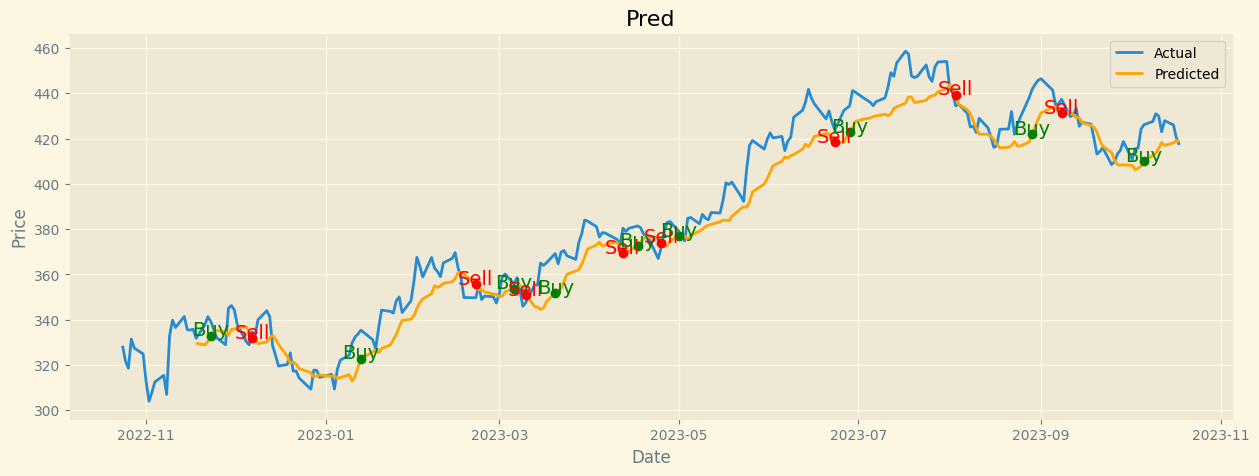

In [2]:
model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(None, 2)), # where 2 is the number of features
        tf.keras.layers.LSTM(32),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1),
        ]
    )

# model.save_weights(f'{Env.PROJECT_ROOT}/models_trained/keep/my_model_weights.h5')
grid_search_service = TFMTS(model, config)
grid_search_service.grid_search(logger, verbose=False)